#### The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
#### The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



##### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



#### Attribute Information:

## The explanations of sensor measurements and their brief statistics are given below.

* Variable (Abbr.) Unit Min Max Mean
* Ambient temperature (AT) C â€“6.23 37.10 17.71
* Ambient pressure (AP) mbar 985.85 1036.56 1013.07
* Ambient humidity (AH) (%) 24.08 100.20 77.87
* Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
* Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
* Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
* Turbine after temperature (TAT) C 511.04 550.61 546.16
* Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
* Turbine energy yield (TEY) MWH 100.02 179.50 133.51
* Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
* Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/updated-Folders/Neural-Network/gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
print('Shape of dataset:', df.shape)

Shape of dataset: (15039, 11)


In [5]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


#### **the distribution of each feature**

C:\Users\91814\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


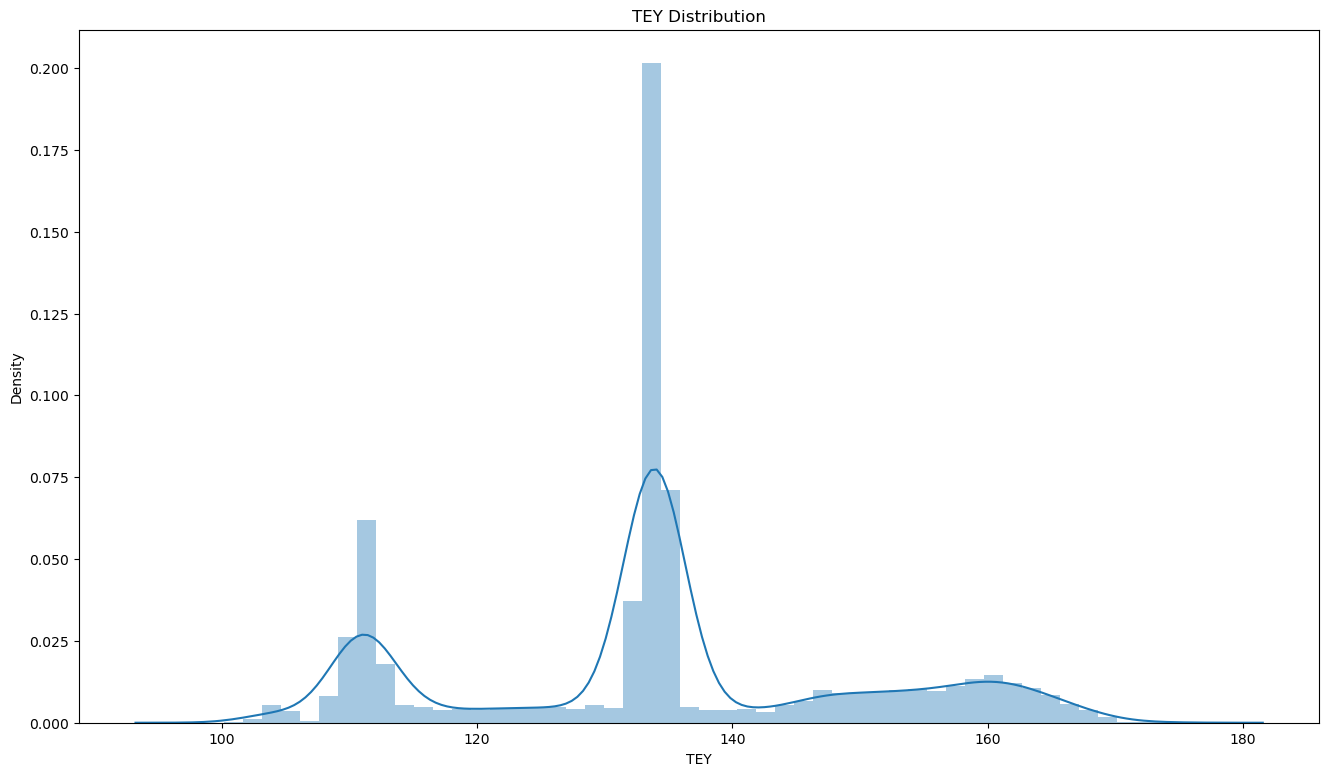

In [6]:
plt.figure(figsize =(16,9))
sns.distplot(df['TEY'])
plt.title('TEY Distribution')
plt.show()

#### **Correlation matrix to see the relationships between each variable**

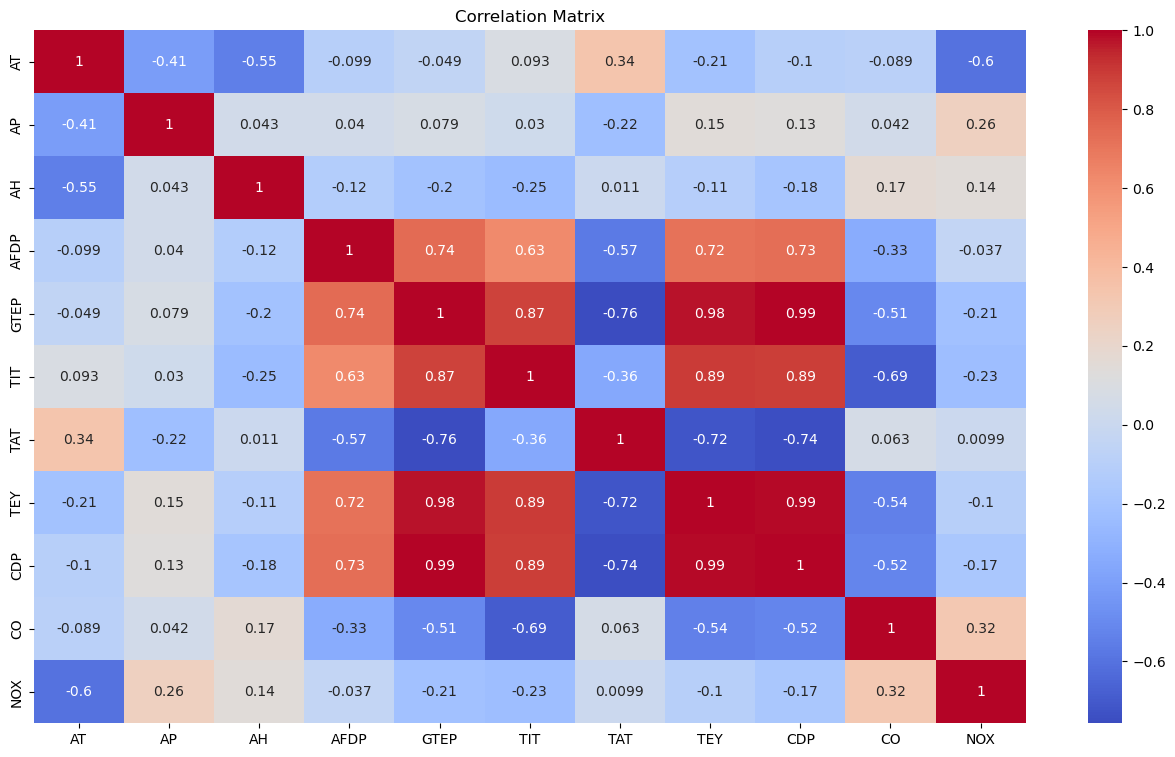

In [7]:
plt.figure(figsize =(16,9))
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

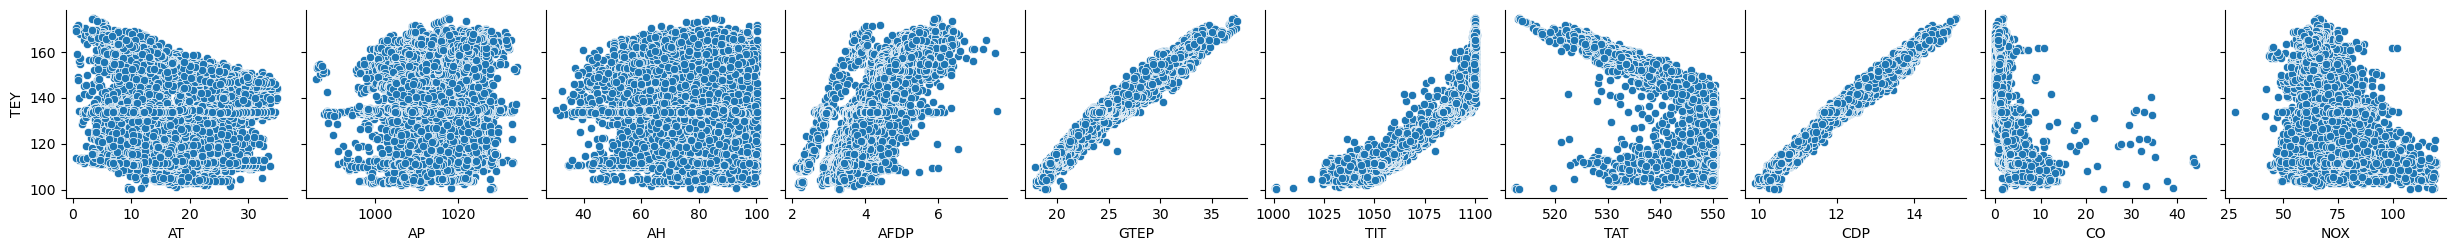

In [8]:
sns.pairplot(df, x_vars=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX'], y_vars=['TEY'])
plt.show()

#### **Split the dataset into training and testing sets**

In [9]:
X = df.drop('TEY', axis=1)
y = df['TEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Train neural network**

In [11]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
376/376 [==============================] - 3s 4ms/step - loss: 552.8217 - val_loss: 128.3572
Epoch 2/100
376/376 [==============================] - 1s 3ms/step - loss: 85.2368 - val_loss: 42.3107
Epoch 3/100
376/376 [==============================] - 1s 3ms/step - loss: 19.2650 - val_loss: 12.1712
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 7.2553 - val_loss: 4.2340
Epoch 5/100
376/376 [==============================] - 1s 4ms/step - loss: 3.3755 - val_loss: 2.7672
Epoch 6/100
376/376 [==============================] - 1s 3ms/step - loss: 2.5004 - val_loss: 2.2381
Epoch 7/100
376/376 [==============================] - 1s 3ms/step - loss: 2.0750 - val_loss: 1.3738
Epoch 8/100
376/376 [==============================] - 1s 3ms/step - loss: 1.9142 - val_loss: 1.8509
Epoch 9/100
376/376 [==============================] - 1s 3ms/step - loss: 2.1769 - val_loss: 1.5291
Epoch 10/100
376/376 [==============================] - 1s 4ms/step - loss: 2.4517 

376/376 [==============================] - 2s 5ms/step - loss: 1.2503 - val_loss: 0.6460
Epoch 82/100
376/376 [==============================] - 2s 4ms/step - loss: 0.9349 - val_loss: 0.7561
Epoch 83/100
376/376 [==============================] - 2s 5ms/step - loss: 1.0550 - val_loss: 0.6470
Epoch 84/100
376/376 [==============================] - 2s 5ms/step - loss: 1.0953 - val_loss: 0.5453
Epoch 85/100
376/376 [==============================] - 2s 4ms/step - loss: 1.1814 - val_loss: 1.4993
Epoch 86/100
376/376 [==============================] - 2s 5ms/step - loss: 1.0791 - val_loss: 0.7144
Epoch 87/100
376/376 [==============================] - 2s 5ms/step - loss: 1.1851 - val_loss: 0.5967
Epoch 88/100
376/376 [==============================] - 1s 3ms/step - loss: 1.0364 - val_loss: 0.8763
Epoch 89/100
376/376 [==============================] - 1s 3ms/step - loss: 1.1249 - val_loss: 1.0822
Epoch 90/100
376/376 [==============================] - 1s 3ms/step - loss: 1.0843 - val_loss: 

#### **Evaluate model**

In [13]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


94/94 [==============================] - 0s 3ms/step
Mean squared error: 0.5579823843899435


#### **Plot the learning curves**

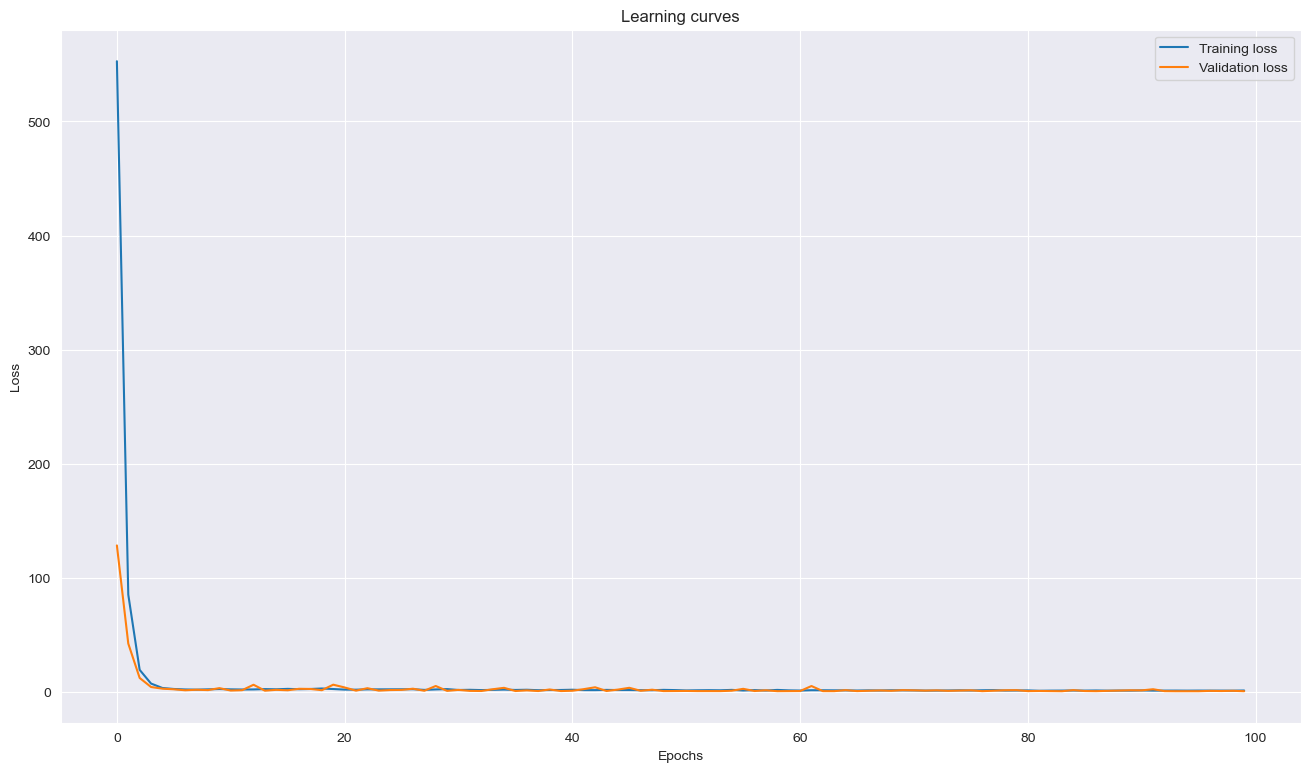

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(16, 9))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Learning curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **Make a prediction for new data points**

In [15]:
new_data = np.array([6.23, 985.85, 24.08, 2.09, 17.70, 1000.85, 511.04, 9.85, 30.00, 25.90]).reshape(1, -1)
tey_pred = model.predict(new_data)
print('Predicted TEY:', tey_pred[0][0])

1/1 [==============================] - 0s 98ms/step
Predicted TEY: 110.85157
